ML ASSIGNMENT (Priyank Soni)

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import plot_model



Using TensorFlow backend.


# Reading csv

In [3]:
p=pd.read_csv("/home/priyank/Downloads/mini_project/data.csv")

#p.head()

keyword= p['Keywords']

overview= p['overview']
overview=(overview.astype(str)).as_matrix()


belongs_to_collection=p['belongs_to_collection']
belongs_to_collection=(belongs_to_collection.astype(str)).as_matrix()




revenue=p['revenue']
revenue=(revenue.astype(float)).as_matrix()
revenue = np.expand_dims(revenue, axis=1)

revenue_train= revenue[:2500]
revenue_test=revenue[2500:]




budget=p['budget']
budget=(budget.astype(float)).as_matrix()
budget = np.expand_dims(budget, axis=1)


genres=p['genres']
genres=(genres.astype(str)).as_matrix()



original_language=p['original_language']
original_language=(original_language.astype(str)).as_matrix()

original_title=p['original_title']
original_title=(original_title.astype(str)).as_matrix()


popularity=p['popularity']
popularity=(popularity.astype(float)).as_matrix()
popularity = np.expand_dims(popularity, axis=1)



runtime=p['runtime']
runtime=(runtime.astype(float)).as_matrix()
runtime = np.expand_dims(runtime, axis=1)

Keywords=p['Keywords']
Keywords=(Keywords.astype(str)).as_matrix()


spoken_languages=p['spoken_languages']
spoken_languages=(spoken_languages.astype(str)).as_matrix()

cast=p['cast']
cast=(cast.astype(str)).as_matrix()


production_companies=p['production_companies']
production_companies=(production_companies.astype(str)).as_matrix()







/home/priyank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/priyank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/home/priyank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/priyank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/priyank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/priyank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in

In [4]:
p.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [710]:
revenue_train.shape

(2500, 1)

# #########Things related to "overview" column

Here overview is text so we need to convert it into some meaningfull numeric data, First we are using a embedding layer and the flatten, output after flattening will be used as input for our model, we are using similar methodology for other text inputs, but some variations in layers used (for example embedding is not needed in  case of keywords)

In [711]:
texts = []

for view in overview:
    texts.append(view)

maxlen = 100 #considering maxlength of a overview
max_words = 10000 #considering only 10000 most common words

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
#labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
#print('Shape of label tensor:', labels.shape)

data_overview=data.astype(float)


data_overview_train=data_overview[:2500]
data_overview_test=data_overview[2500:]



embedding_dim = 100


# Use Input layers, specify input shape (dimensions except first)
inp_multi_hot = keras.layers.Input(shape=(data_overview_train.shape[1],))


# Bind nulti_hot to embedding layer
emb = keras.layers.Embedding(input_dim=10000, output_dim=100)(inp_multi_hot)
flatten = keras.layers.Flatten()(emb)

print(flatten.shape)




Found 18539 unique tokens.
Shape of data tensor: (3000, 100)
(?, 10000)


In [712]:
data_overview_train.shape

(2500, 100)

# things related to "belongs_to_collection"


In [713]:
import re

b_to_c=[]
for i  in belongs_to_collection:
    i
    b_to_c.append(re.findall(r"name': '(.*?)',", i))
    
    
b_to_c_texts=[]
for i  in b_to_c:
    try:
     x= i[0]   
     b_to_c_texts.append(x)
    except:
        b_to_c_texts.append("NA")

       
# Tokenizing the text of the raw data
maxlen = 7  #max length of a sentence
max_words = 2000  #dic size

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(b_to_c_texts)
sequences = tokenizer.texts_to_sequences(b_to_c_texts)
        
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
print('Shape of data tensor:', data.shape)
#print('Shape of label tensor:', labels.shape)        
        
    
data_b_to_c=data.astype(float)    

data_b_to_c_train=data_b_to_c[:2500]
data_b_to_c_test=data_b_to_c[2500:]



# Use Input layers, specify input shape (dimensions except first)
inp_multi_hot_b_t_c = keras.layers.Input(shape=(data_b_to_c_train.shape[1],))


# Bind nulti_hot to embedding layer
emb_b_t_c = keras.layers.Embedding(input_dim=10000, output_dim=100)(inp_multi_hot_b_t_c)
flatten_b_t_c = keras.layers.Flatten()(emb_b_t_c)



Found 673 unique tokens.
Shape of data tensor: (3000, 7)


In [714]:
data_b_to_c_train.shape

(2500, 7)

# things related to "genere"

In [715]:
import re

gen=[]

for i  in genres:
    i
    gen.append(re.findall(r"name': '(.*?)'}", i))
    

#find max len

max_len=0
for g in gen:
    l=len(g)
    if l > max_len:
        max_len=l  
        
        
        
maxlen = max_len
max_words = 20

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(gen)
sequences = tokenizer.texts_to_sequences(gen)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
#labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
#print('Shape of label tensor:', labels.shape)

data_generes=data.astype(float)


data_generes_train=data_generes[:2500]
data_generes_test=data_generes[2500:]


inp_multi_hot_generes = keras.layers.Input(shape=(data_generes_train.shape[1],))


# Bind nulti_hot to embedding layer
#emb = keras.layers.Embedding(input_dim=10000, output_dim=100)(inp_multi_hot)
#flatten = keras.layers.Flatten()(emb)

        

Found 20 unique tokens.
Shape of data tensor: (3000, 7)


In [716]:
inp_multi_hot_generes.shape

TensorShape([Dimension(None), Dimension(7)])

# Original language

In [717]:
org_lan=[]

for i  in original_language:
    i
    org_lan.append(i)
    
    
maxlen = 1
max_words = 40

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(org_lan)
sequences = tokenizer.texts_to_sequences(org_lan)


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
#labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
#print('Shape of label tensor:', labels.shape)

data_org_lang=data.astype(float)

data_org_lang_train=data_org_lang[:2500]
data_org_lang_test=data_org_lang[2500:]


inp_multi_hot_org_lang = keras.layers.Input(shape=(data_org_lang_train.shape[1],))


Found 36 unique tokens.
Shape of data tensor: (3000, 1)


# Original title

In [718]:

org_title=[]

for i  in original_title:
    i
    org_title.append(i)
    
    
maxlen = 8
max_words = 3500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(org_title)
sequences = tokenizer.texts_to_sequences(org_title)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
#labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
#print('Shape of label tensor:', labels.shape)

data_org_title=data.astype(float)


data_org_title_train=data_org_title[:2500]
data_org_title_test=data_org_title[2500:]

inp_multi_hot_org_title = keras.layers.Input(shape=(data_org_title_train.shape[1],))


Found 3807 unique tokens.
Shape of data tensor: (3000, 8)


# Keywords

In [719]:
import re

Keywords_list=[]
for i  in Keywords:
    i
    Keywords_list.append(re.findall(r"name': '(.*?)'}", i))
    
    
Keywords_texts=[]
for i  in Keywords_list:
    try:
     x= i[0]   
     Keywords_texts.append(x)
    except:
        Keywords_texts.append("NA")
        
# Tokenizing the text of the raw data
maxlen = 1  #max length of a sentence
max_words = 1000  #dic size

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(Keywords_texts)
sequences = tokenizer.texts_to_sequences(Keywords_texts)
        
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
print('Shape of data tensor:', data.shape)
#print('Shape of label tensor:', labels.shape)        
        
    
data_Keywords=data.astype(float)    

data_Keywords_train=data_Keywords[:2500]
data_Keywords_test=data_Keywords[2500:]


inp_multi_hot_Keywords = keras.layers.Input(shape=(data_Keywords_train.shape[1],))


Found 1142 unique tokens.
Shape of data tensor: (3000, 1)


# spoken_languages


In [720]:
import re

spoken_lang_list=[]
for i  in spoken_languages:
    i
    spoken_lang_list.append(re.findall(r"name': '(.*?)'}", i))
    
    
spoken_lang_texts=[]
for i  in spoken_lang_list:
    try:
     x= i[0]   
     spoken_lang_texts.append(x)
    except:
        spoken_lang_texts.append("NA")

   
# Tokenizing the text of the raw data
maxlen = 1  #max length of a sentence
max_words = 50  #dic size

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(spoken_lang_texts)
sequences = tokenizer.texts_to_sequences(spoken_lang_texts)
        
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
print('Shape of data tensor:', data.shape)
#print('Shape of label tensor:', labels.shape)        
        
    
data_spoken_lang=data.astype(float)    

data_spoken_lang_train=data_spoken_lang[:2500]
data_spoken_lang_test=data_spoken_lang[2500:]


inp_multi_hot_spoken_lang = keras.layers.Input(shape=(data_spoken_lang_train.shape[1],))

        

Found 50 unique tokens.
Shape of data tensor: (3000, 1)


# cast


In [721]:
import re

cast_list=[]
for i  in cast:
    i
    cast_list.append(re.findall(r"name': '(.*?)',", i))
    
    
cast_texts=[]
for i  in cast_list:
    try:
     x= i[0]   
     cast_texts.append(x)
    except:
        cast_texts.append("NA")
# Tokenizing the text of the raw data
maxlen = 2  #max length of a sentence
max_words = 2000  #dic size

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(cast_texts)
sequences = tokenizer.texts_to_sequences(cast_texts)
        
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
print('Shape of data tensor:', data.shape)
#print('Shape of label tensor:', labels.shape)        
        
    
data_cast=data.astype(float)    

data_cast_train=data_cast[:2500]
data_cast_test=data_cast[2500:]

inp_multi_hot_cast = keras.layers.Input(shape=(data_cast_train.shape[1],))



Found 2373 unique tokens.
Shape of data tensor: (3000, 2)


# popularity and runtime

In [722]:
popularity.shape

(3000, 1)

In [723]:
runtime.shape

(3000, 1)

In [724]:
runtime

array([[ 93.],
       [113.],
       [105.],
       ...,
       [120.],
       [ 90.],
       [106.]])

In [725]:
'''
max_run = max(runtime)

print(max_run)
runtime /= max_run
runtime
'''

'\nmax_run = max(runtime)\n\nprint(max_run)\nruntime /= max_run\nruntime\n'

In [726]:
runtime.shape

(3000, 1)

In [727]:
'''
mean = popularity.mean(axis=0)
popularity -= mean
std = popularity.std(axis=0)
popularity /= std
popularity

'''

'''
for i in range(0,len(runtime)):
    if runtime[i]==0:
        #print('yes')
        runtime[i]=90
'''        

"\nfor i in range(0,len(runtime)):\n    if runtime[i]==0:\n        #print('yes')\n        runtime[i]=90\n"

In [728]:
#popl_runtime = np.concatenate((popularity,runtime),axis=1)

popl_runtime = popularity

In [729]:
popl_runtime.shape

(3000, 1)

In [730]:
popl_runtime_train=popl_runtime[:2500]
popl_runtime_test=popl_runtime[2500:]


In [731]:
popl_runtime_train

array([[ 6.575393],
       [ 8.248895],
       [64.29999 ],
       ...,
       [12.201954],
       [ 0.884241],
       [12.199047]])

In [732]:
inp_num_data_popl_runtime = keras.layers.Input(shape=(popl_runtime_train.shape[1],))

In [733]:
inp_num_data_popl_runtime.shape

TensorShape([Dimension(None), Dimension(1)])

# numeric data (budget)

In [734]:

budget_train=budget[:2500]
budget_test=budget[2500:]


inp_num_data = keras.layers.Input(shape=(budget_train.shape[1],))

In [735]:
budget_train.shape

(2500, 1)

In [736]:
inp_num_data.shape

TensorShape([Dimension(None), Dimension(1)])

# Concatenation of various inputs and define model

Here we will be concatinating different inputs and define our model

In [737]:
conc = keras.layers.Concatenate()([flatten,flatten_b_t_c,inp_multi_hot_generes,inp_multi_hot_org_lang, inp_multi_hot_org_title, inp_multi_hot_Keywords ,inp_multi_hot_spoken_lang,inp_multi_hot_cast, inp_num_data_popl_runtime, inp_num_data])

dense1 = keras.layers.Dense(64, activation=tf.nn.relu, )(conc)

dense2 = keras.layers.Dense(32, activation=tf.nn.relu, )(dense1)

dense3 = keras.layers.Dense(8, activation=tf.nn.relu, )(dense2)

# Creating output layer
out = keras.layers.Dense(1)(dense3)


model = keras.Model(inputs=[inp_multi_hot, inp_multi_hot_b_t_c,inp_multi_hot_generes,inp_multi_hot_org_lang, inp_multi_hot_org_title, inp_multi_hot_Keywords, inp_multi_hot_spoken_lang, inp_multi_hot_cast,inp_num_data_popl_runtime, inp_num_data], outputs=out)


# summarize layers
print(model.summary())
# plot graph
#plot_model(model, to_file='multiple_inputs.png')

model.compile(optimizer=tf.train.RMSPropOptimizer(0.01),
              loss=keras.losses.mean_squared_logarithmic_error,
              metrics=['accuracy'])



#history= model.fit([data_overview_train, data_b_to_c_train,budget_train], revenue_train, epochs=100, validation_data=([data_overview_val, data_b_to_c_val,budget_val], revenue_val))
history= model.fit([data_overview_train, data_b_to_c_train, data_generes_train ,data_org_lang_train, data_org_title_train,data_Keywords_train ,data_spoken_lang_train, data_cast_train, popl_runtime_train, budget_train], revenue_train, epochs=100, validation_split = 0.1)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_186 (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
input_187 (InputLayer)          (None, 7)            0                                            
__________________________________________________________________________________________________
embedding_48 (Embedding)        (None, 100, 100)     1000000     input_186[0][0]                  
__________________________________________________________________________________________________
embedding_49 (Embedding)        (None, 7, 100)       1000000     input_187[0][0]                  
__________________________________________________________________________________________________
flatten_48

2250/2250 [==============================] - 1s 572us/sample - loss: 4.0051 - acc: 0.0018 - val_loss: 8.6073 - val_acc: 0.0000e+00
Epoch 23/100
2250/2250 [==============================] - 1s 569us/sample - loss: 3.9023 - acc: 0.0018 - val_loss: 8.6289 - val_acc: 0.0000e+00
Epoch 24/100
2250/2250 [==============================] - 1s 583us/sample - loss: 3.7354 - acc: 0.0018 - val_loss: 8.6776 - val_acc: 0.0000e+00
Epoch 25/100
2250/2250 [==============================] - 2s 672us/sample - loss: 3.6266 - acc: 0.0018 - val_loss: 8.8495 - val_acc: 0.0000e+00
Epoch 26/100
2250/2250 [==============================] - 2s 836us/sample - loss: 3.5266 - acc: 0.0018 - val_loss: 10.8239 - val_acc: 0.0000e+00
Epoch 27/100
2250/2250 [==============================] - 2s 721us/sample - loss: 3.5120 - acc: 0.0018 - val_loss: 9.1717 - val_acc: 0.0000e+00
Epoch 28/100
2250/2250 [==============================] - 2s 671us/sample - loss: 3.3747 - acc: 0.0018 - val_loss: 9.1478 - val_acc: 0.0000e+00
Epoc

Epoch 79/100
2250/2250 [==============================] - 1s 623us/sample - loss: 2.8032 - acc: 0.0018 - val_loss: 8.5307 - val_acc: 0.0000e+00
Epoch 80/100
2250/2250 [==============================] - 1s 635us/sample - loss: 2.7622 - acc: 0.0018 - val_loss: 8.6061 - val_acc: 0.0000e+00
Epoch 81/100
2250/2250 [==============================] - 1s 659us/sample - loss: 2.8760 - acc: 0.0018 - val_loss: 8.6766 - val_acc: 0.0000e+00
Epoch 82/100
2250/2250 [==============================] - 2s 681us/sample - loss: 2.7476 - acc: 0.0018 - val_loss: 8.7631 - val_acc: 0.0000e+00
Epoch 83/100
2250/2250 [==============================] - 2s 727us/sample - loss: 2.9000 - acc: 0.0018 - val_loss: 8.7930 - val_acc: 0.0000e+00
Epoch 84/100
2250/2250 [==============================] - 1s 662us/sample - loss: 2.8196 - acc: 0.0018 - val_loss: 8.4677 - val_acc: 0.0000e+00
Epoch 85/100
2250/2250 [==============================] - 1s 638us/sample - loss: 2.7621 - acc: 0.0018 - val_loss: 8.5268 - val_acc: 0.0

In [738]:

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model


In [739]:
new_model = keras.models.load_model('my_model.h5')
new_model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_186 (InputLayer)          (None, 100)          0                                            
__________________________________________________________________________________________________
input_187 (InputLayer)          (None, 7)            0                                            
__________________________________________________________________________________________________
embedding_48 (Embedding)        (None, 100, 100)     1000000     input_186[0][0]                  
__________________________________________________________________________________________________
embedding_49 (Embedding)        (None, 7, 100)       1000000     input_187[0][0]                  
__________________________________________________________________________________________________
flatten_48

In [740]:
new_model.predict([data_overview_test, data_b_to_c_test, data_generes_test ,data_org_lang_test, data_org_title_test,data_Keywords_test, data_spoken_lang_test, data_cast_test ,popl_runtime_test, budget_test])

array([[2.97109680e+07],
       [1.23818750e+05],
       [4.16325750e+06],
       [2.86104040e+07],
       [2.53300280e+07],
       [2.42952620e+07],
       [1.48625690e+07],
       [2.38805600e+06],
       [5.13505350e+06],
       [9.50841800e+06],
       [2.14260450e+06],
       [1.94554362e+06],
       [2.97072800e+07],
       [2.13872120e+07],
       [6.53491760e+07],
       [7.86031200e+06],
       [3.89090680e+07],
       [1.15561840e+08],
       [1.06929888e+08],
       [1.14030475e+06],
       [2.73296340e+07],
       [3.68358200e+07],
       [4.28194600e+06],
       [7.13357350e+06],
       [1.17062240e+07],
       [5.58443160e+07],
       [1.18848870e+07],
       [4.75781250e+06],
       [7.12935650e+06],
       [2.97070080e+07],
       [8.31630000e+07],
       [1.78377100e+07],
       [2.97026464e+08],
       [9.51971900e+06],
       [8.91128880e+07],
       [9.50556800e+07],
       [1.64167350e+06],
       [2.55472100e+07],
       [8.20207950e+06],
       [1.84837344e+05],


In [741]:
new_model.compile(optimizer=tf.train.RMSPropOptimizer(0.01),
              loss=keras.losses.mean_squared_logarithmic_error,
              metrics=['accuracy'])


new_model.evaluate([data_overview_test, data_b_to_c_test, data_generes_test ,data_org_lang_test, data_org_title_test,data_Keywords_test, data_spoken_lang_test, data_cast_test,popl_runtime_test, budget_test],revenue_test)

500/500 [==============================] - 1s 1ms/sample - loss: 5.6236 - acc: 0.0000e+00


[5.623606109619141, 0.0]

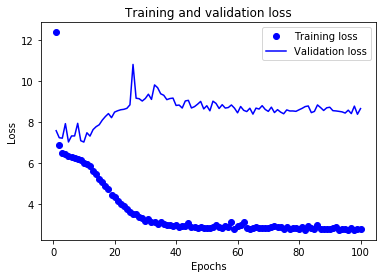

In [742]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#fig1=plt.figure(2,figsize=(7,5))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





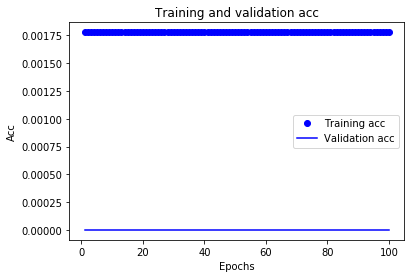

In [743]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

#fig1=plt.figure(2,figsize=(7,5))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()





# Future scope

- Some features can be removed or combined (PCA)
- Pre trained embedding can be used (ex. glove word embeddings) and RNN can also be tried of feature like overview
- some web scraping can be done for getting more data (information) related to existing features like cast, imdbid, etc.
- Regularization can be used for reducing overfitting.

# References::

- https://keras.io/
- google
- Deep learning with python - François Chollet